In [1]:
%%timeit x = range(10000)
    max(x)

1000 loops, best of 3: 231 µs per loop


## Parte 1

In [2]:
import numpy as np
n_samples=500
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
from sklearn.utils import check_random_state
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)

import numpy as np
X = np.concatenate((datos1, datos2), axis=0)
#shift
n = 20
#ruido/noise
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y =  np.concatenate((y1,y2),axis=0)
#Para visualizar las fronteras de los distintos algoritmos clasificadores utilice el siguiente codigo:
%matplotlib inline
import matplotlib.pyplot as plt

def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(12,6))
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02
    # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

(a)  Construya el conjunto de datos (dataset) común con los dos conjuntos generados. Luego se realiza un shift desde el  conjunto  2  al  1,esto  se  puede  ver  en  la  imagen  anterior,  donde  el  conjunto  de  color naranjo  (media  luna)  tiene  puntos  azules  a  la derecha  pertenecientes  al  otro  conjunto,  esto  es  con el  mismo  propósito  de  trabajar  con  un dataset no ideal.  Determine  cuantos registros  contiene cada conjunto y visualícelos.

In [3]:
print ("El conjunto X tiene "+str(X.shape[0])+" filas y "+str(X.shape[1])+" columnas")

print ("El conjunto y tiene "+str(y.shape[0])+" filas y 1 columna")


El conjunto X tiene 1000 filas y 2 columnas
El conjunto y tiene 1000 filas y 1 columna


(b)  Entrene  el  clasificador *Linear  Discriminant  Analysis (LDA)*  y  visualice  la  frontera  de  decisi ́on  que define este algoritmo. analice cualitativamente lo que observa.

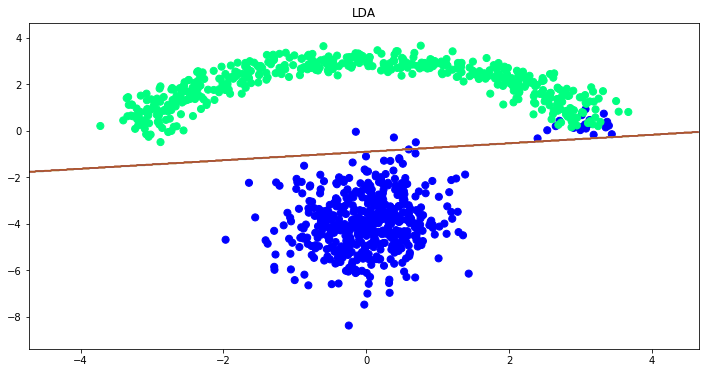

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model = LDA()
model.fit(X,y)
ypredLDA = model.predict(X)
visualize_border(model,X,y,"LDA")

Como se puede observar LDA genera una frontera lineal, la cual debido a la naturaleza de los datos (ruido) presenta visualmente errores de clasificación en la cercania de la frontera

(c) Entrene el clasificador *Quadratic Discriminant Analysis(QDA)* y visualice la frontera de decisión que define este algoritmo. Analice cualitativamente lo que observa y compare con LDA, en qué difieren y en qu ́e se asemejan ¿Qué distribución de probabilidad asumen cada uno?

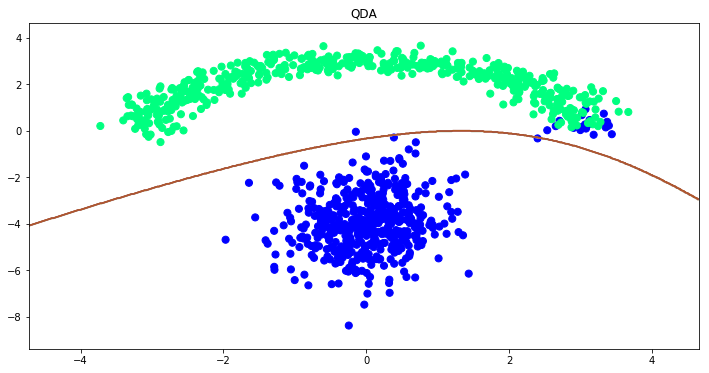

In [4]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model = QDA()
model.fit(X,y)
ypredQDA = model.predict(X)
visualize_border(model,X,y,"QDA")

A diferencia de LDA , QDA logra mejorar la curva frontera entre las dos clases, fallando en la zona donde el ruido de los datos es más fuerte.

(d) Compare cuantitativamente los clasificadores LDA Y QDA en este dataset sintético mediante la métrica de error de clasificación.

In [6]:
from sklearn.metrics import accuracy_score
def accuracy(y_true,y_pred):
    print("Miss Classification Loss: %f"%(1-accuracy_score(y_true,y_pred)))

accuracy(y,ypredLDA)
accuracy(y,ypredQDA)

Miss Classification Loss: 0.023000
Miss Classification Loss: 0.020000


Como se esperaba LDA tiene mayor error que QDA, dado a que LDA no logra evitar el error de clasificacion en la coordenadas (0,-2) mientras QDA si

(e) Construya una función que entrene/ajuste un modelo de Regresión Logística Regularizado (utilizando como penalizador la norma $l_{2}$), experimente con distintos valores del parámetro de regularización mediante  el  gráfico  interactivo.  Explique el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [7]:
from ipywidgets import interactive
def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X,y)

In [8]:
from sklearn.linear_model import LogisticRegression as LR
def train_model(param):
    model=LR()
    #define your model
    model.set_params(C=param,penalty='l2')
    model.fit(X,y)
    return model
p_min =0.1
#define your range
p_max =10.0

#define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

(f) Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) Lineal. Mediante la imagen interactiva explore  diferentes valores del parámetro de regularización C. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [9]:
from sklearn.svm import SVC as SVM
def train_model(param):
    model = SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X,y)
    return model
#useinteractive
stringtipo = 'linear'

In [10]:
interactive(visualize_border_interactive,param=(p_min,p_max))

(g)  Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) no Lineal. Mediante la imagen interactiva explore diferentes valores del parámetro de regularización C y con diferentes *kernels*. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [11]:
def train_model(param):
    model = SVM()
    model.set_params(C=param,kernel='rbf')
    model.fit(X,y)
    return model

In [12]:
interactive(visualize_border_interactive,param=(p_min,p_max))

(h)  Construya un Árbol de Decisión de múltiples niveles para la clasificación del problema. Puede utilizar el criterio y la función de partición que prefiera. Mediante la imagen interactiva explore diferentes valores del parámetro de máxima profunidad del ́arbol. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [13]:
from sklearn.tree import DecisionTreeClassifier as Tree
def train_model(param):
    model = Tree()
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X,y)
    return model

In [14]:
p_min=1
p_max=50
interactive(visualize_border_interactive,param=(p_min,p_max))

(i)  Construya un algoritmo *k-N N* para la clasificación del problema. Mediante la imagen interactiva explore diferentes valores del parámetro k. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
def train_model(param):
    model=KNeighborsClassifier()
    model.set_params(n_neighbors=param)
    model.fit(X,y)
    return model

In [16]:
p_min=1
p_max=50
interactive(visualize_border_interactive,param=(p_min,p_max))

## Parte 2 Análisis de audios como datos brutos

In [19]:
from scipy.io import wavfile

SAMPLE_RATE = 44100

def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b

(a)  Construya un dataframe con los datos a analizar. Describa el dataset y determine cu ́antos registros hay por clase.

(b)  Lea los archivos .wav y transformelos en secuencias de tiempo. Realice un padding de ceros al final de cada secuencia para que todas queden representadas con la misma cantidad de elementos, explique la importancia de realizar este paso.

(c) Manipule los datos y cambie las etiquetas de los audios por otras asignadas por un doctor experto [4], el cual afirma que estos cambios son requeridos. Vuelva a determinar cu´antos registros hay por clase. N´otese que ahora son 3 clases ¿Explique la problem´atica de tener etiquetas mal asignadas en los datos? ¿Un solo dato puede afectar esto?

(d) Codifique las distintas clases a valores num´ericos para que puedan ser trabajados por los algoritmos clasificadores.

(e) Desordene los datos, evitando as´ı el orden en el que vienen la gran mayor´ıa de las etiquetas. Cree la matriz que conforma a los datos en sus dimensiones sin preprocesar, es decir, cada ejemplo es una secuencia de amplitudes en el tiempo. ¿Las dimensiones de ´esta indica que puede generar problemas? ¿De qu´e tipo?

(f) Para pre procesar la secuencia en el tiempo realice una transformada de fourier discreta [5] para pasar los datos desde el dominio de tiempos al dominio de frecuencias presentes en la sen˜al de sonido.

(g) Para seguir con el pre procesamiento realice un muestreo representativo de los datos a trav´es de una t´ecnica de muestreo especializada en secuencias ¿En qu´e beneficia este paso? ¿C´omo podr´ıa determinar si el muestro es representativo?

(h) Genere un conjunto de pruebas mediante la t´ecnica *hold-out validation* para verificar la calidad de los clasificadores. ¿Cu´antas clases tiene y de qu´e taman˜o queda cada conjunto?

(i) Realice un proceso de estandarizar los datos para ser trabajados adecuadamente. Recuerde que solo se debe ajustar (calcular media y desviaci´on est´andar) con el conjunto de entrenamiento.

(j) Realice una reducci´on de dimensionalidad a trav´es de la t´ecnica PCA, para representar los datos en d = 2 dimensiones. Recuerde que solo se debe ajustar (encontrar las componentes principales) con el conjunto de entrenamiento. Visualice apropiadamente la proyecci´on en 2 dimensiones.

(k) Entrene un modelo de Regresi´on Log´ıstica variando el par´ametro de regularizacion C construyendo un gr´afico resumen del error en funci´on de este hiper-par´ametro. Adem´as entrene una M´aquina de Soporte Vectorial (SVM) con kernel lineal, variando el hiper-par´ametro de regularizacion C en el mismo rango que para la Regresi´on Log´ıstica, construyendo el mismo gr´afico resumen. Compare.

(l) Entrene un Arbol de Decisi´on, con la configuraci´on que estime conveniente, variando el hiper-par´ametro´ regularizador max depth, construyendo un gr´afico resumen del error en funci´on de este par´ametro. Compare con los modelos anteriores.

(m)	Experimente con diferentes dimensiones d para la proyecci´on de PCA con el prop´osito de obtener un modelo con menor error. Construya una tabla o gr´afico resumen.

(n)	Realice otra reducci´on de dimensionalidad ahora a trav´es de la t´ecnica LDA, para representar los datos en d = 2 dimensiones. Recuerde que s´olo se debe ajustar con el conjunto de entrenamiento, si semmuestra un warning explique el porqu´e. Visualice apropiadamente la proyecci´on en 2 dimensiones.

(o)	Con el prop´osito de encontrar el mejor modelo vuelva a realizar el item h) con el i) en el nuevo espacio generado por la representaci´on segu´n las d dimensiones de la proyecci´on LDA. Esta nueva representaci´on ¿mejora o empeora el desempen˜o? Explique.

(p)	Intente mejorar el desempen˜o de los algoritmos ya entrenados. Disen˜e ahora sus propias cracter´ısticas (feature crafting) a partir de los datos brutos (secuencia de amplitudes), puede inspirarse en otros trabajos [6] [7] si desea.

## Parte 3 Análisis de emociones en tweets

(a) Construya un dataframe con los datos a analizar. Determine cu´antas clases existen, cu´antos registros por clase y describa el *dataset*.

In [91]:
import pandas as pd
df = pd.read_csv("text_emotion.csv")

In [92]:
pd.crosstab(df['author'],df['sentiment'],margins=True)

sentiment,anger,boredom,empty,enthusiasm,fun,happiness,hate,love,neutral,relief,sadness,surprise,worry,All
author,,,,,,,,,,,,,,
000yea000,0,0,0,0,0,0,0,1,0,0,0,0,0,1
001BabyGirl,0,0,0,0,0,0,0,0,1,0,0,0,0,1
00mouse2000,0,0,0,0,0,0,0,0,0,0,1,0,0,1
06Di06,0,0,0,0,0,0,0,0,0,0,0,0,1,1
08vintagelove,0,0,0,0,0,0,0,1,0,0,0,0,0,1
0BS0L33T,0,0,0,0,0,0,0,0,1,0,0,0,0,1
0CandacENicolE0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
0liviaa,0,0,0,0,0,0,0,0,0,0,0,0,1,1
0m4r,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [93]:
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."


In [94]:
df.drop(['tweet_id'],axis=1,inplace=True)

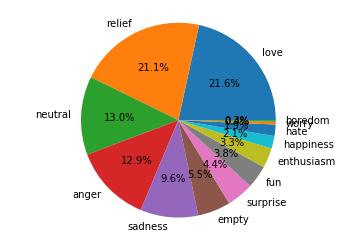

In [95]:
sentiment_counts = df['sentiment'].value_counts()
#print sentiment_counts
#print list(set(df.sentiment.values))
plt.pie(sentiment_counts,labels=list(set(df.sentiment.values)),autopct='%1.1f%%')
plt.axis('equal')
plt.show()

(b) Construya un conjunto de entrenamiento y otro de pruebas, a trav´es de una m´ascara aleatoria, para verificar los resultados de los algoritmos.

In [96]:
import numpy as np
msk = np.random.rand(len(df)) < 0.8
train = pd.DataFrame(df[msk])
test = pd.DataFrame(df[~msk])

(c)	Implemente y explique un pre-procesamiento para los tweets para dejarlos en un formato est´andarizado en el cual se podr´an trabajar.

In [97]:
#preproccesing functions
def coding(col,codeDict):
    colCoded = pd.Series(col,copy=True)
    for key,value in codeDict.items():
        colCoded.replace(key,value,inplace=True)
    return colCoded
def num_missing(x):
    return sum(x.isnull())

In [98]:
# Se nota que no faltan datos en el df
print train.apply(num_missing,axis=0)

sentiment    0
author       0
content      0
dtype: int64


In [99]:
#estandarizacion del texto en la columna content mediante liberias de re y nlt
import re, nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

#Cambia el texto de cualquier forma presente a minusculas
def normalizer(content):
    without_user_name = re.sub("(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9]+)"," ",content)
    without_links = re.sub("https?:\/\/.*[\r\n]*"," ",without_user_name)
    short_words = re.sub("\b\w\b"," ",without_links)
    #without_hashtags = re.sub("(?<=^|(?<=[^a-zA-Z0-9-_\.]))#([A-Za-z]+[A-Za-z0-9]+)"," ",without_links)
    only_letters = re.sub("[^a-zA-Z]", " ",short_words) 
    tokens = nltk.word_tokenize(only_letters)
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case))
    lemmas = [wordnet_lemmatizer.lemmatize(t,pos='v') for t in filtered_result]
    return lemmas


In [100]:
pd.set_option('display.max_colwidth', -1) # Setting this so we can see the full content of cells
train['normalized_tweet'] = train.content.apply(normalizer)
test['normalized_tweet'] = test.content.apply(normalizer)

In [101]:
train[['content','normalized_tweet']].head(100)

,content,normalized_tweet
0,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[,"[know, listenin, bad, habit, earlier, start, freakin, part]"
1,Layin n bed with a headache ughhhh...waitin on your call...,"[layin, n, bed, headache, ughhhh, waitin, call]"
2,Funeral ceremony...gloomy friday...,"[funeral, ceremony, gloomy, friday]"
4,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will.","[want, trade, someone, houston, ticket, one]"
5,Re-pinging @ghostridah14: why didn't you go to prom? BC my bf didn't like my friends,"[ping, go, prom, bc, bf, like, friends]"
8,@charviray Charlene my love. I miss you,"[charlene, love, miss]"
9,@kelcouch I'm sorry at least it's Friday?,"[sorry, least, friday]"
10,cant fall asleep,"[cant, fall, asleep]"
11,Choked on her retainers,"[choke, retainers]"
12,Ugh! I have to beat this stupid song to get to the next rude!,"[ugh, beat, stupid, song, get, next, rude]"


(d)	Haga una reducci´on binaria al problema, para trabajarlo como un problema de clasificaci´on de dos clases. Para esto, agrupe las distintas emociones como positivas y negativas (defina un criterio), se recomienda codificar las clases como +1 y −1 respectivamente. Recuerde tener presente que el desbalanceo de los datos puede afectar considerablemente al modelo.

In [102]:
dictionary = {"anger": -1,"boredom": -1,"empty": -1,"enthusiasm": 1,"fun": 1,"happiness": 1,"hate": -1,"love": 1,"neutral": 1,"relief": 1,"sadness": -1,"surprise" : -1,"worry": -1}
train['sentiment'] = coding(train['sentiment'],dictionary)
dictionary = {"anger": -1,"boredom": -1,"empty": -1,"enthusiasm": 1,"fun": 1,"happiness": 1,"hate": -1,"love": 1,"neutral": 1,"relief": 1,"sadness": -1,"surprise" : -1,"worry": -1}
test['sentiment'] = coding(test['sentiment'],dictionary)


 1    17361
-1    14634
Name: sentiment, dtype: int64


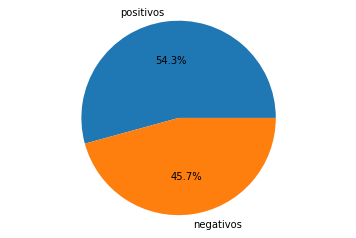

In [103]:
sentiment_counts = train['sentiment'].value_counts()
print sentiment_counts
plt.pie(sentiment_counts,labels=['positivos','negativos'],autopct='%1.1f%%')
plt.axis('equal')
plt.show()

(e)	Para construir un clasificador que determine autom´aticamente la polaridad de un trozo de texto, ser´a necesario representar los tweets $\{t_{i}\}^{n}_{i=1}$ disponibles como vectores de caracter´ısticas (features). El tipo de caracter´ısticas m´as utilizado consiste en contar cu´antas veces aparecen ciertos t´erminos/palabras en el texto. Para esto, es necesario un vocabulario que, por lo general, se construye mediante la uni´on de todas las palabras que se observen en los tweets.

In [104]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [105]:
traindata = [" ".join(x) for x in train.normalized_tweet]
testdata = [" ".join(x) for x in test.normalized_tweet]

train_label = train.sentiment
test_label = test.sentiment

In [106]:
count_vec = CountVectorizer(lowercase = False)
count_vec.fit(traindata)

Xtrain = count_vec.transform(traindata)
Xtest = count_vec.transform(testdata)

print Xtrain.shape
print Xtest.shape

(31995, 22580)
(8005, 22580)


In [107]:
tf_transformer = TfidfTransformer(use_idf=False).fit(Xtrain)
Xtrain_tf = tf_transformer.transform(Xtrain)
print Xtrain_tf.shape
Xtest_tf = tf_transformer.transform(Xtest)
print Xtest_tf.shape

(31995, 22580)
(8005, 22580)


(f)	Entrene y compare al menos 5 de los diferentes clasificadores vistos en clases para clasificaci´on binaria (por ejemplo: Navie Bayes, Multinomial Naive Bayes, LDA, QDA, Regresi´on log´ıstica, SVM y Arboles de decisi´on) sobre el conjunto de entrenamiento verificando su desempen˜o sobre ambos conjuntos (entrenamiento y de pruebas), construyendo un gr´afico resumen del error de ´estos

In [108]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from pprint import pprint
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix,accuracy_score

In [109]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [111]:
bnb= BernoulliNB()
#fitting
bnb.fit(Xtrain_tf, train_label)
#ypred
ypredBnb = bnb.predict(Xtest_tf)
print ypredBnb.shape
print test_label.shape
print ('Bernoulli accuracy score')
print (accuracy_score(test_label, ypredBnb))


(8005,)
(8005,)
Bernoulli accuracy score
0.702685821362


Confusion matrix, without normalization
[[2217 1399]
 [ 981 3408]]


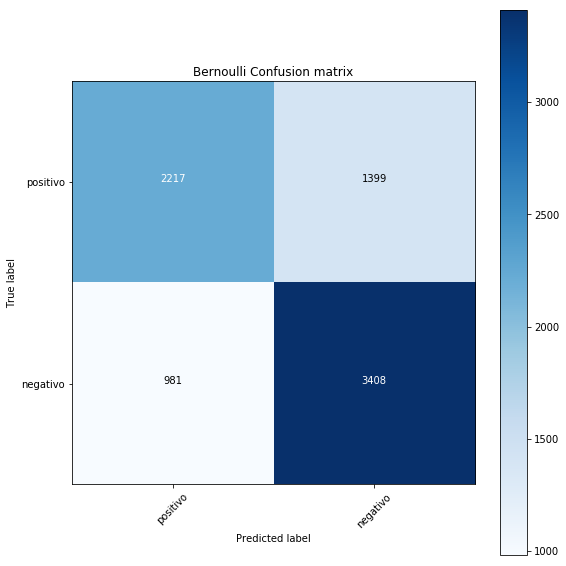

In [113]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(confusion_matrix(test_label, ypredBnb), classes=['positivo','negativo'],
                      title='Bernoulli Confusion matrix')

plt.show()

In [119]:
mnb= MultinomialNB()
#fitting
mnb.fit(Xtrain_tf, train_label)
#ypred
ypredmnb = mnb.predict(Xtest_tf)
print ('Multinomial accuracy score')
print (accuracy_score(test_label, ypredmnb))


Multinomial accuracy score
0.697439100562


Confusion matrix, without normalization
[[2063 1553]
 [ 869 3520]]


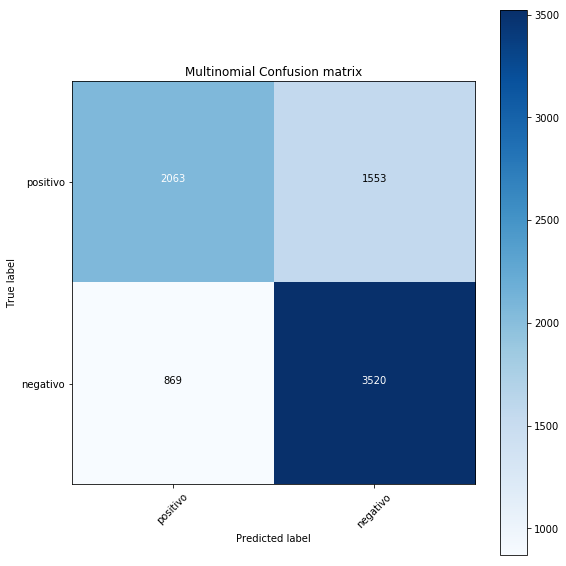

In [121]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(confusion_matrix(test_label, ypredmnb), classes=['positivo','negativo'],
                      title='Multinomial Confusion matrix')

plt.show()

In [209]:
from sklearn.linear_model import LogisticRegression
C_array = [0.01,0.1,0.7,0.8,1,10,100,1000]
best = 0.0
c_b = 0.01
for C in C_array:
    lr = LogisticRegression(penalty='l2',C=C)
    lr.fit(Xtrain_tf, train_label)
    ypredlr = lr.predict(Xtest_tf)
    print ('Logistic Regression accuracy score C= %f'%C)
    acc = accuracy_score(test_label, ypredlr)
    print (acc)
    if(acc > best):
        best = acc
        ypredlr_b = ypredlr
    

Logistic Regression accuracy score C= 0.010000
0.639600249844
Logistic Regression accuracy score C= 0.100000
0.695440349781
Logistic Regression accuracy score C= 0.700000
0.708307307933
Logistic Regression accuracy score C= 0.800000
0.708806995628
Logistic Regression accuracy score C= 1.000000
0.706433479076
Logistic Regression accuracy score C= 10.000000
0.693566520924
Logistic Regression accuracy score C= 100.000000
0.661086820737
Logistic Regression accuracy score C= 1000.000000
0.639225484072


Confusion matrix, without normalization
[[2237 1379]
 [ 952 3437]]


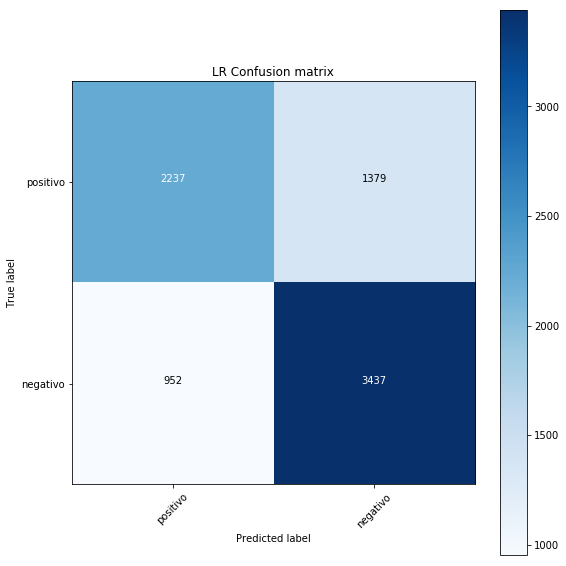

In [210]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(confusion_matrix(test_label, ypredlr_b), classes=['positivo','negativo'],
                      title='LR Confusion matrix')

plt.show()

In [136]:
from sklearn.svm import LinearSVC, NuSVC, SVC

In [139]:
lsvm= LinearSVC()
#fitting
lsvm.fit(Xtrain_tf, train_label)
#ypred
ypredlsvm = lsvm.predict(Xtest_tf)
print ('Linear Svm accuracy score')
print (accuracy_score(test_label, ypredlsvm))

Linear Svm accuracy score
0.692317301686


In [141]:
nusvm=NuSVC(kernel='linear')
#fitting
nusvm.fit(Xtrain_tf, train_label)
#ypred
ypredNusvm = nusvm.predict(Xtest_tf)
print ('Non Linear svm accuracy score')
print (accuracy_score(test_label, ypredNusvm))

Non Linear svm accuracy score
0.679450343535


In [142]:
nusvmpoly=NuSVC(kernel='poly')
#fitting
nusvmpoly.fit(Xtrain_tf, train_label)
#ypred
ypredNusvmpoly = nusvmpoly.predict(Xtest_tf)
print ('Non Linear poly svm accuracy score')
print (accuracy_score(test_label, ypredNusvmpoly))

Non Linear poly svm accuracy score
0.640724547158


In [164]:
nusvmrbf=NuSVC(kernel='rbf')
#fitting
nusvmrbf.fit(Xtrain_tf, train_label)
#ypred
ypredNusvmrbf = nusvmpoly.predict(Xtest_tf)
print ('Non Linear rbf svm accuracy score')
print (accuracy_score(test_label, ypredNusvmrbf))

Non Linear rbf svm accuracy score
0.640724547158


In [168]:
C_array = [1000,5000,10000,20000]
best = 0.0
c_b = 0.01
for C in C_array:
    svcrbf = SVC(C=C,kernel='poly')
    svcrbf.fit(Xtrain_tf, train_label)
    ypredsvcp = model.predict(Xtest_tf)
    print ('SVC accuracy score C= %f'%C)
    acc = accuracy_score(test_label, ypredsvcp)
    print (acc)
    if(acc > best):
        best = acc
        ypredsvcp_b = ypredsvcp
    

SVC accuracy score C= 1000.000000
0.707058088695
SVC accuracy score C= 5000.000000
0.707058088695
SVC accuracy score C= 10000.000000
0.707058088695
SVC accuracy score C= 20000.000000
0.707058088695


(g)	Utilice y explique las m´etricas que calcula la funci´on classification report de la librer´ıa sklearn. En base a las distintas m´etricas calculadas ¿Cu´ales clasificadores son los que mejor se comportan?

In [206]:
from sklearn.metrics import classification_report
def score_the_model(model,x,y,xt,yt,name,targets):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print "%s Training Accuracy: %f"%(name,acc_tr)
    print "%s Test Accuracy: %f"%(name,acc_test)
    print "Detailed Analysis Testing Results ..."
    print (classification_report(yt, model.predict(xt),target_names=targets))


La función classification_report()calcula 4 métricas (precision, recall, f1-score, support).Donde el significado de precision es una indice entre los true positive y false positive, es decir representa la habilidad para clasificar correctamente las clases, algo parecido como se ve arriba con la matriz de confusión. El significado de recall tasa entre los true positive y el resto de las clases que no son el target ( true positive + false negative), esto representa la habilidad del clasificador en no dejar fuera los ejemplos de la clase propia, es decir, etiquetar correctamente los de la clase objetivo . f1-score realiza un promedio harmónico/ponderado entre las métricas de precision y recall , su dominio va de 0 a 1 con su mejor en 1. Finalmente support es el indice de la cantidad de ejemplos usados en la clase

In [155]:
score_the_model(bnb,Xtrain_tf,train_label,Xtest_tf,test_label,"Bernoulli Naive Bayes",["positivo","negativo"])

Bernoulli Naive Bayes Training Accuracy: 0.804469
Bernoulli Naive Bayes Test Accuracy: 0.702649
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

   positivo       0.69      0.61      0.65      3616
   negativo       0.71      0.78      0.74      4389

avg / total       0.70      0.70      0.70      8005



In [156]:
score_the_model(mnb,Xtrain_tf,train_label,Xtest_tf,test_label,"Multinomial Naive Bayes",["positivo","negativo"])

Multinomial Naive Bayes Training Accuracy: 0.779778
Multinomial Naive Bayes Test Accuracy: 0.697401
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

   positivo       0.70      0.57      0.63      3616
   negativo       0.69      0.80      0.74      4389

avg / total       0.70      0.70      0.69      8005



In [160]:
score_the_model(lr,Xtrain_tf,train_label,Xtest_tf,test_label,"Logistic Regresion",["positivo","negativo"])

Linear SVM Training Accuracy: 0.900078
Linear SVM Test Accuracy: 0.639180
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

   positivo       0.61      0.58      0.59      3616
   negativo       0.66      0.69      0.68      4389

avg / total       0.64      0.64      0.64      8005



In [161]:
score_the_model(lsvm,Xtrain_tf,train_label,Xtest_tf,test_label,"Linear SVM",["positivo","negativo"])

Logistic Regresion Training Accuracy: 0.843007
Logistic Regresion Test Accuracy: 0.692279
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

   positivo       0.67      0.62      0.65      3616
   negativo       0.71      0.75      0.73      4389

avg / total       0.69      0.69      0.69      8005



In [162]:
score_the_model(nusvm,Xtrain_tf,train_label,Xtest_tf,test_label,"No linear SVM kernel lineal",["positivo","negativo"])

No linear SVM kernel lineal Training Accuracy: 0.864916
No linear SVM kernel lineal Test Accuracy: 0.679410
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

   positivo       0.66      0.61      0.63      3616
   negativo       0.70      0.74      0.72      4389

avg / total       0.68      0.68      0.68      8005



In [163]:
score_the_model(nusvmpoly,Xtrain_tf,train_label,Xtest_tf,test_label,"No linear SVM kernel poly",["positivo","negativo"])

No linear SVM kernel poly Training Accuracy: 0.767245
No linear SVM kernel poly Test Accuracy: 0.640680
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

   positivo       0.58      0.71      0.64      3616
   negativo       0.71      0.59      0.64      4389

avg / total       0.65      0.64      0.64      8005



In [165]:
score_the_model(nusvmrbf,Xtrain_tf,train_label,Xtest_tf,test_label,"No linear SVM kernel rbf",["positivo","negativo"])

No linear SVM kernel rbf Training Accuracy: 0.698453
No linear SVM kernel rbf Test Accuracy: 0.687031
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

   positivo       0.74      0.47      0.58      3616
   negativo       0.66      0.87      0.75      4389

avg / total       0.70      0.69      0.67      8005



[Opcional] Visualice las predicciones de algu´n modelo generativo (probabil´ıstico) definido anteriormente, tomando un subconjunto aleatorio de tweets de pruebas y explorando las probabilidades que asigna el clasificador a cada clase.

In [191]:
import random
test_pred = lr.predict_proba(Xtest_tf)
spl = random.sample(xrange(len(test_pred)), 5)
for text, sentiment in zip(df.content[spl], test_pred[spl]):
    if(sentiment[0]>sentiment[1]):
        print '[+]'+text
    else:
        print '[-]'+text

[+]There is something wrong with me! I'm so tired I can barely keep my eyes open. Yet all I've done for the last 3hrs is toss &amp; turn in bed
[+]It has come to my attention from a 16yo friend that I've recently gained a TON of weight. He didn't know it was me.
[+]The Good: I drank Jager and licked a hot asian girl's foot. The Bad: I was reminded once again that I will never get asian girls ever.
[+]Sitting by myself. Everyone took the good seats.
[-]Nooo i wanna watch the comet  dont wanna go workk!!!


(i)	Ahora deber´a extender el problema a las mu´ltiples clases que tiene presente (las distintas emociones), es decir, su trabajo ser´a el de predecir una de las distintas emociones de cada tweet. Para esto utilice el mismo pre-procesamiento realizado en el punto c) y las caracter´ısticas generadas mediante las t´ecnicas en el punto e). Recuerde que tendr´a que codificar las distintas clases como valores num´ericos enteros.

In [192]:
msk = np.random.rand(len(df)) < 0.8
train2 = pd.DataFrame(df[msk])
test2 = pd.DataFrame(df[~msk])

In [194]:
train2['normalized_tweet'] = train2.content.apply(normalizer)
test2['normalized_tweet'] = test2.content.apply(normalizer)

In [195]:
dictionary = {"anger": 0,"boredom": 1,"empty": 2,"enthusiasm": 3,"fun": 4,"happiness": 5,"hate": 6,"love": 7,"neutral": 8,"relief": 9,"sadness": 10,"surprise" : 11,"worry": 12}
train2['sentiment'] = coding(train2['sentiment'],dictionary)
dictionary = {"anger": 0,"boredom": 1,"empty": 2,"enthusiasm": 3,"fun": 4,"happiness": 5,"hate": 6,"love": 7,"neutral": 8,"relief": 9,"sadness": 10,"surprise" : 11,"worry": 12}
test2['sentiment'] = coding(test2['sentiment'],dictionary)


In [197]:
traindata2 = [" ".join(x) for x in train2.normalized_tweet]
testdata2 = [" ".join(x) for x in test2.normalized_tweet]

train_label2 = train2.sentiment
test_label2 = test2.sentiment


In [198]:
count_vec2 = CountVectorizer(lowercase = False)
count_vec2.fit(traindata)

Xtrain2 = count_vec2.transform(traindata2)
Xtest2 = count_vec2.transform(testdata2)

In [199]:
tf_transformer2 = TfidfTransformer(use_idf=False).fit(Xtrain2)
Xtrain_tf2 = tf_transformer2.transform(Xtrain2)

Xtest_tf2 = tf_transformer2.transform(Xtest2)


(j)	Utilice los clasificadores que son extendidos por defecto a mu´ltiples clases para detectar emociones en cada tweet, muestre sus desempen˜os a trav´es del error de pruebas en un gr´afico resumen.

Bernoulli accuracy score
0.320402834763
Confusion matrix, without normalization
[[   0    0    0    0    0    0    0    1   12    0    3    0    8]
 [   0    0    0    0    0    0    0    0   13    0    1    0   21]
 [   0    0    0    0    0    7    0    0   94    0    5    0   58]
 [   0    0    0    0    0    3    0    3   81    0    8    0   48]
 [   0    0    0    0    0   59    0    9  195    0    5    0   98]
 [   0    0    0    0    0  162    0   62  559    0   15    0  262]
 [   0    0    0    0    0    6    0    0  102    0   19    0  189]
 [   0    0    0    0    0   90    0  140  344    0    7    0  171]
 [   0    0    0    0    1   58    0   30 1275    0   26    1  426]
 [   0    0    0    0    0   25    0    8  150    0    4    0   99]
 [   0    0    0    0    0   27    0    6  327    0   69    0  569]
 [   0    0    0    0    0   21    0   11  210    0   10    1  158]
 [   0    0    0    0    0   49    0   12  623    0   56    1  930]]


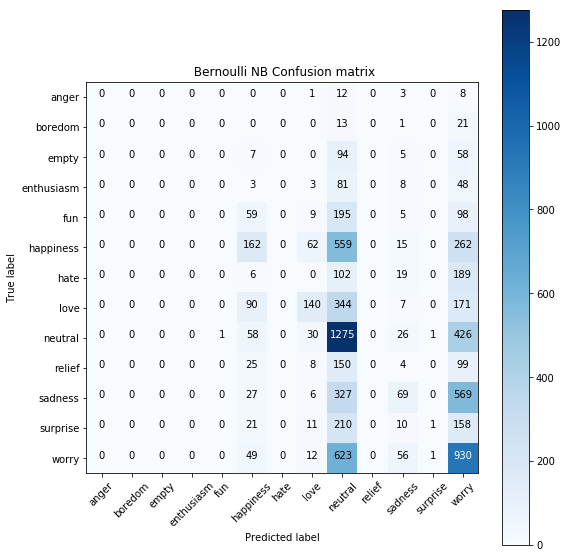

Multinomial Naive Bayes Training Accuracy: 0.447946
Multinomial Naive Bayes Test Accuracy: 0.320443
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

      anger       0.00      0.00      0.00        24
    boredom       0.00      0.00      0.00        35
      empty       0.00      0.00      0.00       164
 enthusiasm       0.00      0.00      0.00       143
        fun       0.00      0.00      0.00       366
  happiness       0.32      0.15      0.21      1060
       hate       0.00      0.00      0.00       316
       love       0.50      0.19      0.27       752
    neutral       0.32      0.70      0.44      1817
     relief       0.00      0.00      0.00       286
    sadness       0.30      0.07      0.11       998
   surprise       0.33      0.00      0.00       411
      worry       0.31      0.56      0.40      1671

avg / total       0.28      0.32      0.25      8043



In [208]:
bnb2= BernoulliNB()
#fitting
bnb2.fit(Xtrain_tf2, train_label2)
#ypred
ypredBnb2 = bnb2.predict(Xtest_tf2)

print ('Bernoulli accuracy score')
print (accuracy_score(test_label2, ypredBnb2))

plt.figure(figsize=(8,8))
plot_confusion_matrix(confusion_matrix(test_label2, ypredBnb2), 
                      classes=["anger","boredom","empty","enthusiasm",
                               "fun","happiness","hate","love","neutral",
                               "relief","sadness","surprise","worry"],
                      title=' Bernoulli NB Confusion matrix')

plt.show()

score_the_model(bnb2,Xtrain_tf2,train_label2,Xtest_tf2,test_label2,"Multinomial Naive Bayes",
                ["anger","boredom","empty","enthusiasm",
                               "fun","happiness","hate","love","neutral",
                               "relief","sadness","surprise","worry"])


Bernoulli accuracy score
0.309088648514
Confusion matrix, without normalization
[[   0    0    0    0    0    0    0    1   12    0    3    0    8]
 [   0    0    0    0    0    0    0    0   13    0    1    0   21]
 [   0    0    0    0    0    7    0    0   94    0    5    0   58]
 [   0    0    0    0    0    3    0    3   81    0    8    0   48]
 [   0    0    0    0    0   59    0    9  195    0    5    0   98]
 [   0    0    0    0    0  162    0   62  559    0   15    0  262]
 [   0    0    0    0    0    6    0    0  102    0   19    0  189]
 [   0    0    0    0    0   90    0  140  344    0    7    0  171]
 [   0    0    0    0    1   58    0   30 1275    0   26    1  426]
 [   0    0    0    0    0   25    0    8  150    0    4    0   99]
 [   0    0    0    0    0   27    0    6  327    0   69    0  569]
 [   0    0    0    0    0   21    0   11  210    0   10    1  158]
 [   0    0    0    0    0   49    0   12  623    0   56    1  930]]


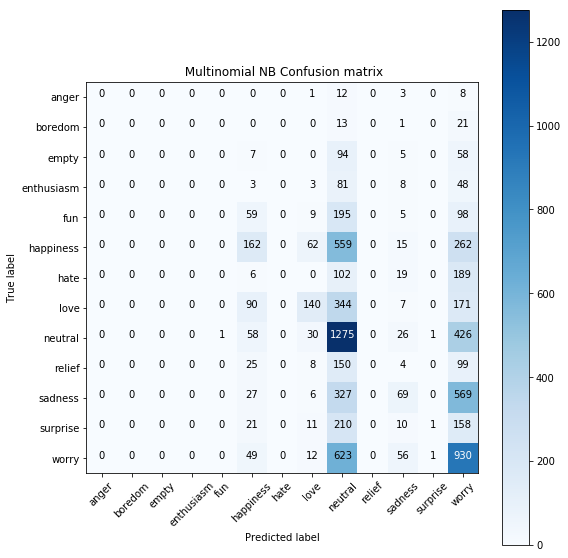

Multinomial Naive Bayes Training Accuracy: 0.395125
Multinomial Naive Bayes Test Accuracy: 0.309127
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

      anger       0.00      0.00      0.00        24
    boredom       0.00      0.00      0.00        35
      empty       0.00      0.00      0.00       164
 enthusiasm       0.00      0.00      0.00       143
        fun       0.00      0.00      0.00       366
  happiness       0.37      0.16      0.22      1060
       hate       0.00      0.00      0.00       316
       love       0.55      0.19      0.28       752
    neutral       0.33      0.50      0.40      1817
     relief       0.00      0.00      0.00       286
    sadness       0.46      0.03      0.05       998
   surprise       0.00      0.00      0.00       411
      worry       0.27      0.74      0.40      1671

avg / total       0.29      0.31      0.24      8043



In [207]:
mnb2= MultinomialNB()
#fitting
mnb2.fit(Xtrain_tf2, train_label2)
#ypred
ypredMnb2 = mnb2.predict(Xtest_tf2)

print ('Bernoulli accuracy score')
print (accuracy_score(test_label2, ypredMnb2))

plt.figure(figsize=(8,8))
plot_confusion_matrix(confusion_matrix(test_label2, ypredBnb2), 
                      classes=["anger","boredom","empty","enthusiasm",
                               "fun","happiness","hate","love","neutral",
                               "relief","sadness","surprise","worry"],
                      title=' Multinomial NB Confusion matrix')

plt.show()
score_the_model(mnb2,Xtrain_tf2,train_label2,Xtest_tf2,test_label2,"Multinomial Naive Bayes",
                ["anger","boredom","empty","enthusiasm",
                               "fun","happiness","hate","love","neutral",
                               "relief","sadness","surprise","worry"])

In [214]:
from sklearn.linear_model import LogisticRegression
C_array2 = [0.01,0.4,0.5,0.6,0.7,0.8,1,10]
best2 = 0.0
c_b2 = 0.01
for C in C_array2:
    lr2 = LogisticRegression(penalty='l2',C=C)
    lr2.fit(Xtrain_tf2, train_label2)
    ypredlr2 = lr2.predict(Xtest_tf2)
    print ('Logistic Regression accuracy score C= %f'%C)
    acc2 = accuracy_score(test_label2, ypredlr2)
    print (acc2)
    if(acc2 > best2):
        best2 = acc2
        ypredlr_b2 = ypredlr2

Logistic Regression accuracy score C= 0.010000
0.296655476812
Logistic Regression accuracy score C= 0.400000
0.351610095735
Logistic Regression accuracy score C= 0.500000
0.354221061793
Logistic Regression accuracy score C= 0.600000
0.357702349869
Logistic Regression accuracy score C= 0.700000
0.359194330474
Logistic Regression accuracy score C= 0.800000
0.358199676738
Logistic Regression accuracy score C= 1.000000
0.356459032699
Logistic Regression accuracy score C= 10.000000
0.336192962825


Confusion matrix, without normalization
[[   0    0    0    0    0    1    0    1   12    0    2    0    8]
 [   0    0    0    0    0    2    0    0   10    0    6    0   17]
 [   0    0    0    0    0   12    0    2   96    1    8    1   44]
 [   0    0    0    0    0   20    0    7   60    0   10    1   45]
 [   0    0    0    0    2  100    0   24  139    1   16    3   81]
 [   0    0    0    0    6  373    4  105  369    1   18    7  177]
 [   0    0    0    0    0    4   35    6  100    0   34    1  136]
 [   0    0    0    0    2  152    1  300  187    0   20    3   87]
 [   0    0    0    0    2  180    5   60 1125    2   70    5  368]
 [   0    0    0    0    1   59    0   14  115    9    8    0   80]
 [   0    0    0    0    0   50   11   30  255    1  215    4  432]
 [   0    0    0    0    1   48    2   23  170    1   19   17  130]
 [   0    0    0    0    2  102   14   39  532    1  162    6  813]]


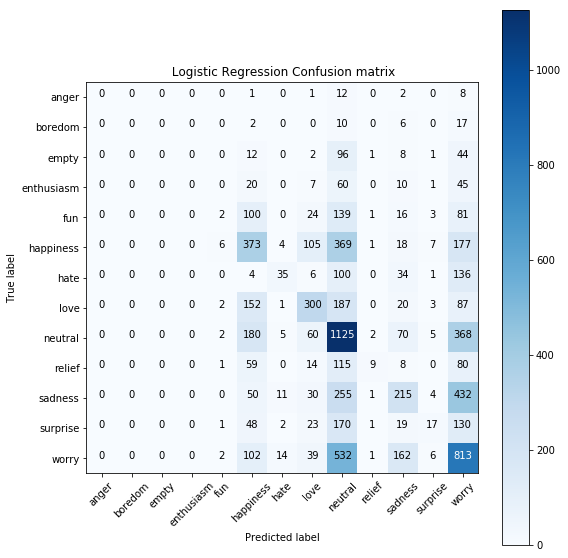

In [215]:
lr2 = LogisticRegression(penalty='l2',C=0.7)
lr2.fit(Xtrain_tf2, train_label2)
ypredlr2 = lr2.predict(Xtest_tf2)
plt.figure(figsize=(8,8))
plot_confusion_matrix(confusion_matrix(test_label2, ypredlr2), 
                      classes=["anger","boredom","empty","enthusiasm",
                               "fun","happiness","hate","love","neutral",
                               "relief","sadness","surprise","worry"],
                      title=' Logistic Regression Confusion matrix')

plt.show()

(k)	Utilice clasificadores binarios que pueden ser extendidos a trav´es de otras t´ecnicas, tal como One vs One y One vs All/Rest [14]

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
clf1 = OneVsRestClassifier(SVC(gamma=0.01, C=100., probability=True, class_weight='balanced', kernel='linear'))
clf_output1 = clf1.fit(Xtrain_tf2, train_label2)

(l) Para el caso de la Regresi´on Log´ıstica compare sus dos m´etodos para ser extendidos a mu´ltiples clases. Uno a trav´es de One vs Rest y otro definiendo que la variable a predecir se distribuye Multinomial.

Confusion matrix, without normalization
[[   0    0    0    0    0    1    0    1   12    0    2    0    8]
 [   0    0    0    0    0    2    0    0   10    0    6    0   17]
 [   0    0    0    0    0   11    1    2   95    3    8    1   43]
 [   0    0    0    0    0   21    0    5   61    0   11    1   44]
 [   0    0    0    0    4  100    0   26  143    1   16    3   73]
 [   0    0    0    0   10  376    4  106  356    2   18    8  180]
 [   0    0    0    0    0    4   37    6   98    0   40    1  130]
 [   0    0    0    0    2  155    2  304  179    1   19    4   86]
 [   0    0    0    0    4  190    6   63 1085    3   80    7  379]
 [   0    0    0    0    1   60    0   14  115   11    9    1   75]
 [   0    0    0    0    1   48   17   29  253    1  229    5  415]
 [   0    0    0    0    1   51    2   24  162    1   25   19  126]
 [   0    0    0    0    2  105   15   40  518    1  180    8  802]]


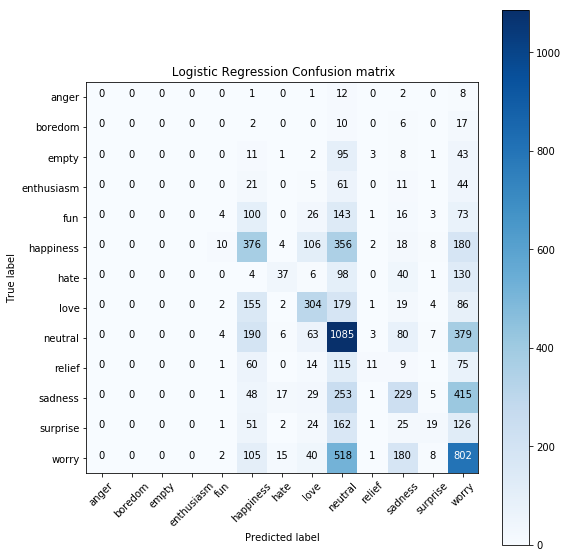

In [221]:
lr3 = LogisticRegression(multi_class='ovr').fit(Xtrain_tf2, train_label2)
ypredlr3 = lr3.predict(Xtest_tf2)
plt.figure(figsize=(8,8))
plot_confusion_matrix(confusion_matrix(test_label2, ypredlr3), 
                      classes=["anger","boredom","empty","enthusiasm",
                               "fun","happiness","hate","love","neutral",
                               "relief","sadness","surprise","worry"],
                      title=' Logistic Regression Confusion matrix')

plt.show()

Confusion matrix, without normalization
[[   0    0    0    0    0    1    0    1   12    0    2    0    8]
 [   0    0    0    0    0    2    0    0   10    0    6    0   17]
 [   0    0    0    0    0   11    1    2   95    3    8    1   43]
 [   0    0    0    0    0   21    0    5   61    0   11    1   44]
 [   0    0    0    0    4  100    0   26  143    1   16    3   73]
 [   0    0    0    0   10  376    4  106  356    2   18    8  180]
 [   0    0    0    0    0    4   37    6   98    0   40    1  130]
 [   0    0    0    0    2  155    2  304  179    1   19    4   86]
 [   0    0    0    0    4  190    6   63 1085    3   80    7  379]
 [   0    0    0    0    1   60    0   14  115   11    9    1   75]
 [   0    0    0    0    1   48   17   29  253    1  229    5  415]
 [   0    0    0    0    1   51    2   24  162    1   25   19  126]
 [   0    0    0    0    2  105   15   40  518    1  180    8  802]]


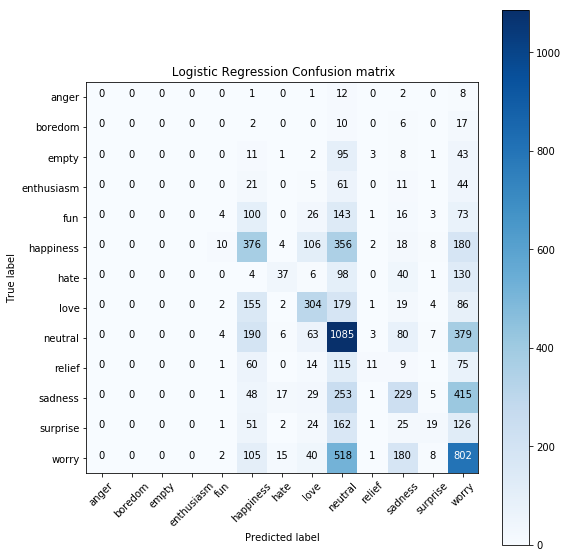

In [225]:
lr4 = LogisticRegression(multi_class='multinomial',solver='sag').fit(Xtrain_tf2, train_label2)
ypredlr4 = lr4.predict(Xtest_tf2)
plt.figure(figsize=(8,8))
plot_confusion_matrix(confusion_matrix(test_label2, ypredlr3), 
                      classes=["anger","boredom","empty","enthusiasm",
                               "fun","happiness","hate","love","neutral",
                               "relief","sadness","surprise","worry"],
                      title=' Logistic Regression Confusion matrix')

plt.show()

(m) Compare los resultados entre los clasificadores extendidos por defecto y los binarios que son extendidos mediante otras t´ecnicas, construya una tabla o gr´afico resumen. Los clasificadores que mejor se comportan en el caso binario ¿Siguen teniendo ese desempen˜o en mu´ltiples clases?